In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('F:\DATA ANALYST\LogisticRegression-1.xlsx')
data

,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,5,3.928,0,0
4,5,2.528,1,0
5,6,2.473,0,1
6,7,2.384,0,0
7,8,7.076,0,0
8,9,1.182,1,1
9,10,3.345,0,0


In [3]:
data.describe()

,Customer,Spending,Card,Coupon
count,25.000000,25.000000,25.000000,25.000000
mean,13.040000,3.288640,0.360000,0.360000
std,7.311407,2.142376,0.489898,0.489898
min,1.000000,0.002000,0.000000,0.000000
25%,7.000000,2.222000,0.000000,0.000000
50%,13.000000,2.528000,0.000000,0.000000
75%,19.000000,3.928000,1.000000,1.000000
max,25.000000,8.888000,1.000000,1.000000


In [4]:
data['Coupon'].unique()

array([0, 1], dtype=int64)

In [5]:
data['Coupon'].value_counts()

0    16
1     9
Name: Coupon, dtype: int64

In [7]:
from sklearn  import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
x=data[['Card','Spending']]
y=data['Coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [10]:
len(x_train), len(y_train), len(x_test), len(y_test)

(18, 18, 7, 7)

In [13]:
Lreg=LogisticRegression(solver='lbfgs')
Lreg.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
y_predict=Lreg.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [16]:
y_predict_train=Lreg.predict(x_train)
y_predict_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
y_prob_train=Lreg.predict_proba(x_train)[:,1]
y_prob_train.reshape(1,-1)

array([[0.28291287, 0.44145165, 0.44246846, 0.28332629, 0.44200977,
        0.2837186 , 0.44179162, 0.28317581, 0.44258525, 0.43948595,
        0.28300395, 0.28137003, 0.44361842, 0.44032796, 0.4430813 ,
        0.44070866, 0.44247637, 0.44250987]])

In [18]:
y_prob=Lreg.predict_proba(x_test)[:,1]
y_prob_train.reshape(1,-1)

array([[0.28291287, 0.44145165, 0.44246846, 0.28332629, 0.44200977,
        0.2837186 , 0.44179162, 0.28317581, 0.44258525, 0.43948595,
        0.28300395, 0.28137003, 0.44361842, 0.44032796, 0.4430813 ,
        0.44070866, 0.44247637, 0.44250987]])

In [20]:
#Summary of Logistic Model
x=data[['Card','Spending']]
y=data['Coupon']
x1=sm.add_constant(x)
logit_model=sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.625701
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                   25
Model:                          Logit   Df Residuals:                       22
Method:                           MLE   Df Model:                            2
Date:                Fri, 02 Oct 2020   Pseudo R-squ.:                 0.04242
Time:                        16:18:35   Log-Likelihood:                -15.643
converged:                       True   LL-Null:                       -16.335
                                        LLR p-value:                    0.5001
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.918      0.078      0.938      -1.728       1.872
Card          -1.0956      0.

In [22]:
#Calculating Accuracy Score using Confusion Matrix
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
score

0.7142857142857143

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[5, 0],
       [2, 0]], dtype=int64)

In [24]:
tn,fp,fn,tp=confusion_matrix(y_test,y_predict).ravel()
print('True Negatives',tn)
print('False Positive',fp)
print('False Negative',fn)
print('True Positive',tp)

True Negatives 5
False Positive 0
False Negative 2
True Positive 0


In [27]:
#Performance of Logistic Model
Accuracy=(tp+tn)/(tp+tn+fp+fn)
print('Accuracy : {:0.2f}'.format(Accuracy))

Accuracy : 0.71


In [28]:
Specificity=tn/(tn+fp)
print('Specificity : {:0.2f}'.format(Specificity))

Specificity : 1.00


In [29]:
Sensitivity=tp/(tp+fn)
print('Sensitivity : {:0.2f}'.format(Sensitivity))

Sensitivity : 0.00


In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
log_roc_auc=roc_auc_score(y_train,y_predict_train)
fpr,tpr,threshold=roc_curve(y_train,y_prob_train)
roc_auc=auc(fpr,tpr)

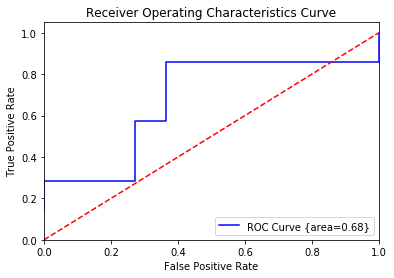

In [32]:
plt.figure()
plt.plot(fpr,tpr,color='blue',label='ROC Curve {area=%0.2f}'%roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()